#A - Objective and Overview

## **Objective**

Use unsupervised learning to cluster similar tight ends together, in an attempt to improve fantasy football draft decisions

## **Feature Description:**
**DP**: draft pick where player was selected in the NFL draft

**REC_per_GP**: receptions per game

**REC_Yards_per_GP**: receiving yards per game

**REC_TDs_per_GP**: receiving touchdowns per game

**Yards_per_REC**: yards gained per receptions

**PPR_per_GP**: average fantasy points per game (PPR style scoring) in college

**Combined_REC_MS**: a metric designed to represent a player's receiving production in their college offense

**RecPTMPA**: receptions per team pass attempt

**REC_Yards_per_TM_PA**: receiving yards per team pass attempt

**REC_TDS_per_TM_PA**: receiving touchdowns per team pass attempt

**TE_CD**: represents the player's percentage of their team's offense in respect to the team's yardage and touchdowns

**TE_BOA**: the age in a season a tight end first achieves a greater than 15% receiving dominator rating

**yards_per_rec_over_tm_avg**: receiving yards per reception compared to the player's college team performance of receiving yards per reception

**BMI**: body mass index (BMI) recorded during the NFL Combine. Formula = Mass (lb) / Height (in)^2 x 703

**forty_time**: time it takes a player to complete a sprint measuring 40 yards. Times not recorded at the NFL combine are adjusted by adding .05 seconds to the player time.

**Hand_Size**: the distance from the tip of the pinky to the tip of the thumb with the fingers spread out (recorded at NFL combine)

**Arm_Length**: the distance from the end of the bicep or shoulder blade to the tip of the middle finger with the arm extended (recorded at NFL combine)

**Power_5_Conference**: indicates whether the player played for a school belonging in one of the 'Power 5 Conferences' (Big 10, Big 12, ACC, SEC, or PAC-12) (0 = No, 1 = Yes)

**Early_Declare**: indicates whether a player declared for the NFL draft before his senior year season (0 = No, 1 = Yes)

**Agility Score**: a metric intended to measure a player's lateral agility and quickness

**Height Adjusted Speed Score (HaSS)**: an athleticism metric developed by Shawn Siegele that creates a metric for wide receivers that adjusts a player's 40 time for height.

**Relative Athletic Score (RAS)**: a metric created by Kent Lee Platte that can easily and intuitively gauge a player’s athletic abilities relative to the position they play

**Freak Score**: an athleticism metric that accounts for the height, weight, and speed of a prospect

## **Recognition:**
Credit to FF_Spaceman for the dataset. Data source: https://docs.google.com/spreadsheets/d/1H8Gqmq7EOfIxS_LG72iAhIhpKJZJyjjOZnGarXZrjp0/edit#gid=279165759

#B - Setup

##1.0 Import Libraries and Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [ ]:
df = pd.read_csv('2023_TE_Database.csv', header = 2)

##2.0 Preview Data

In [ ]:
df.head(50)

,Player,School,Conf,DOB,DR,DP,Draft Year,Draft Age,NCAA Szns,18,...,40 time.1,Bench.1,Vertical.1,Broad.1,Shuttle.1,3 Cone.1,Top 5 TE,Top 12 TE,Top 24 TE,AVG PPG YR 1-3
0,Ben Sims,Baylor,Big 12,5/16/2000,UDFA,UDFA,2023,23,4,NaN,...,-,-,-,-,-,-,-,-,-,-
1,Blake Whiteheart,Wake Forest,ACC,3/22/2000,UDFA,UDFA,2023,23,3,NaN,...,-,-,-,-,-,-,-,-,-,-
2,Brady Russell,Colorado,Pac-12,8/31/1998,UDFA,UDFA,2023,25,5,NaN,...,-,-,-,-,-,-,-,-,-,-
3,Brayden Willis,Oklahoma,Big 12,11/11/1999,7,247,2023,23,5,2.0,...,-,-,-,-,-,-,-,-,-,-
4,Brenton Strange,Penn ST,Big Ten,12/27/2000,2,61,2023,22,4,1.0,...,-,-,-,-,-,-,-,-,-,-
5,Cameron Latu,Alabama,SEC,2/24/2000,3,101,2023,23,4,1.0,...,-,-,-,-,-,-,-,-,-,-
6,Camren McDonald,Florida ST,ACC,5/30/1999,UDFA,UDFA,2023,24,5,NaN,...,-,-,-,-,-,-,-,-,-,-
7,Christian Sims,Bowling Green ST,MAC,2/15/2001,UDFA,UDFA,2023,22,4,6.0,...,-,-,-,-,-,-,-,-,-,-
8,Dalton Kincaid,Utah,Pac-12,10/18/1999,1,25,2023,23,3,NaN,...,-,-,-,-,-,-,-,-,-,-
9,Daniel Barker,Michigan ST,Big Ten,9/23/1999,UDFA,UDFA,2023,23,5,NaN,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df.describe()

,Draft Year,Draft Age,NCAA Szns,18,19,20,21,22,23,18.1,...,GP,REC,REC/GP,REC Yards,REC Yards/GP,REC TDs,REC TDs/GP,Yards/REC,PPR Points,PPR/GP
count,443.000000,443.000000,443.000000,118.000000,283.000000,384.000000,380.000000,278.000000,90.000000,118.000000,...,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,2013.663657,22.683973,3.496614,5.389831,7.141343,7.950521,9.123684,9.589928,9.677778,9.779661,...,29.270880,76.674944,2.532054,965.979684,31.991648,8.643341,0.288964,12.534537,225.132957,7.466591
std,6.121486,0.876744,0.827613,3.656241,3.562186,3.641242,3.272653,3.238560,3.111515,12.606562,...,9.360248,41.409477,0.956999,540.519125,13.674478,5.748430,0.166803,2.292572,123.247368,3.030122
min,2003.000000,20.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,7.000000,0.200000,0.000000,0.000000,4.000000,1.700000,0.200000
25%,2009.000000,22.000000,3.000000,2.000000,4.000000,5.000000,7.000000,8.000000,8.000000,1.250000,...,23.000000,47.000000,1.900000,583.000000,22.300000,4.000000,0.177500,11.100000,137.800000,5.250000
50%,2014.000000,23.000000,4.000000,5.000000,8.000000,8.000000,10.000000,11.000000,10.000000,5.000000,...,30.000000,70.000000,2.400000,901.000000,30.400000,8.000000,0.261000,12.500000,206.500000,7.100000
75%,2019.000000,23.000000,4.000000,8.750000,10.000000,11.000000,12.000000,12.000000,12.000000,12.750000,...,36.000000,100.000000,3.150000,1287.000000,39.550000,12.000000,0.382000,13.900000,289.700000,9.150000
max,2023.000000,26.000000,6.000000,14.000000,13.000000,16.000000,15.000000,15.000000,14.000000,69.000000,...,51.000000,247.000000,6.300000,2901.000000,89.000000,31.000000,1.000000,21.000000,692.900000,19.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Columns: 181 entries, Player to AVG PPG YR 1-3
dtypes: float64(50), int64(7), object(124)
memory usage: 626.6+ KB


##3.0 Data Preprocessing, Cleaning, and Feature Engineering

###3.1 Remove Undrafted Free Agents (UDFA) from Dataset

In [ ]:
#Remove undrafted players from dataset
df = df[df.DR != 'UDFA']
df = df[df.DP != 'UDFA']

In [ ]:
#df = df.rename(columns={"Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "NCAA Szns": "NCAA_Szns", "RushATTGP": "Rush_ATT_per_GP", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age"})



#'Rush_ATT_per_GP', 'Rush_Yards_per_GP', 'Rush_TDs_per_GP', 'Yards_per_Carry', 'REC_per_GP', 'REC_Yards_per_GP', 'REC_TDs_per_GP', 'Yards_per_REC', 'Touches_per_GP', 'PPR_per_GP', 'Combined_RUSH_MS', 'Combined_REC_MS', 'Yds_per_Carry_Over_TM_AVG', 'Yards_per_TM_Rush_ATT', 'RUSH_CD', 'REC_CD', 'RB_BOA', 'forty_time', 'Agility_Score', 'three_cone', 'Top_5_RB', 'Top_12_RB', 'Top_24_RB', 'AVG_PPG_YR_1_3']

###3.2 Select Columns of Interest

In [ ]:
draft_df = df[['Player', 
               'Conf',
               'DR', 
               'DP', 
               'Draft Year', 
               'Draft Age', 
               'NCAA Szns',
               'GP',
               'REC',
               'REC Yards',
               'REC TDs',
               'Yards/REC',
               'PPR Points',
               'Combined REC MS',
               'RecPTMPA',
               'YDs/REC Over TM AVG',
               'REC Yards/TM PA',
               'REC TDS/TM PA',
               'TE CD',
               'TE BOA ',
               'BMI',
               'Handsize',
               'Arm Length',
               '40 time',
               'Agility Score',
               'HaSS',
               'RAS',
               'Freak Score',
               'Top 5 TE',
               'Top 12 TE',
               'Top 24 TE',
               'AVG PPG YR 1-3'
]]

In [ ]:
draft_df.head()

,Player,Conf,DR,DP,Draft Year,Draft Age,NCAA Szns,GP,REC,REC Yards,...,Arm Length,40 time,Agility Score,HaSS,RAS,Freak Score,Top 5 TE,Top 12 TE,Top 24 TE,AVG PPG YR 1-3
3,Brayden Willis,Big 12,7,247,2023,23,5,38,75,998,...,33.25,-,11.66,-,4.65,-,-,-,-,-
4,Brenton Strange,Big Ten,2,61,2023,22,4,32,70,755,...,31.13,4.70,11.71,102.61,9.07,70.53,-,-,-,-
5,Cameron Latu,SEC,3,101,2023,23,4,28,56,787,...,32.38,-,-,-,6.24,-,-,-,-,-
8,Dalton Kincaid,Pac-12,1,25,2023,23,3,26,107,1414,...,32.63,-,-,-,-,-,-,-,-,-
10,Darnell Washington,SEC,3,92,2023,22,3,27,45,774,...,34.38,4.64,-,121.80,9.88,90.15,-,-,-,-


###3.3 Rename Columns

In [ ]:
draft_df = draft_df.rename(columns={"Draft Year": "draft_year", 
                                    "Draft Age": "draft_age", 
                                    "NCAA Szns": "ncaa_szns", 
                                    "REC Yards": "rec_yards", 
                                    "REC TDs": "rec_tds", 
                                    "Yards/ Carry": "yards_per_carry", 
                                    "Yards/REC": "yards_per_rec", 
                                    "PPR Points": "ppr_points", 
                                    "Combined REC MS": "combined_rec_ms", 
                                    "YDs/REC Over TM AVG": "yards_per_rec_over_tm_avg", 
                                    "REC Yards/TM PA": "rec_yards_per_tm_pa",
                                    "REC TDS/TM PA": "rec_tds_per_tm_pa",
                                    "TE CD": "te_cd", 
                                    "TE BOA ": "te_boa",  
                                    "Handsize": "hand_size",
                                    "Arm Length": "arm_length",
                                    "40 time": "forty_time", 
                                    "Agility Score": "agility_score",
                                    "Freak Score": "freak_score", 
                                    "Top 5 TE": "top_5_te", 
                                    "Top 12 TE": "top_12_te", 
                                    "Top 24 TE": "top_24_te", 
                                    "AVG PPG YR 1-3": "avg_ppg_yr_1_3"})                 

###3.3 Replace and Convert Non-numeric Data to Numeric

In [ ]:
#replace '-' with 24, indicating they did not breakout in college (assuming college years age 18-23)
draft_df['te_boa'] = draft_df['te_boa'].replace('-',24)

#Replace non-numeric values
draft_df['BMI'] = draft_df['BMI'].replace('-',np.nan);
draft_df['forty_time'] = draft_df['forty_time'].replace('-',np.nan);
draft_df['agility_score'] = draft_df['agility_score'].replace('-',np.nan);
draft_df['hand_size'] = draft_df['hand_size'].replace('-',np.nan);
draft_df['arm_length'] = draft_df['arm_length'].replace('-',np.nan);
draft_df['freak_score'] = draft_df['freak_score'].replace('-',np.nan);
draft_df['combined_rec_ms'] = draft_df['combined_rec_ms'].replace('-',np.nan);
draft_df['te_cd'] = draft_df['te_cd'].replace('-',np.nan);
draft_df['yards_per_rec_over_tm_avg'] = draft_df['yards_per_rec_over_tm_avg'].replace('-',np.nan);
draft_df['HaSS'] = draft_df['HaSS'].replace('-',np.nan);
draft_df['RAS'] = draft_df['RAS'].replace('-',np.nan);
draft_df['avg_ppg_yr_1_3'] = draft_df['avg_ppg_yr_1_3'].replace('-',0.0);
draft_df['yards_per_rec'] = draft_df['yards_per_rec'].replace('-',0.0)
draft_df['top_5_te'] = draft_df['top_5_te'].replace('-',0)
draft_df['top_12_te'] = draft_df['top_12_te'].replace('-',0)
draft_df['top_24_te'] = draft_df['top_24_te'].replace('-',0)
draft_df['RecPTMPA'] = draft_df['RecPTMPA'].replace('-',0)
draft_df['rec_yards_per_tm_pa'] = draft_df['rec_yards_per_tm_pa'].replace('-',0)
draft_df['rec_tds_per_tm_pa'] = draft_df['rec_tds_per_tm_pa'].replace('-',0)

#convert data types to float
draft_df["DR"] = draft_df.DR.astype(float)
draft_df["DP"] = draft_df.DP.astype(float)
draft_df["te_boa"] = draft_df.te_boa.astype(float)
draft_df["BMI"] = draft_df.BMI.astype(float)
draft_df["hand_size"] = draft_df.hand_size.astype(float)
draft_df["arm_length"] = draft_df.arm_length.astype(float)
draft_df["freak_score"] = draft_df.freak_score.astype(float)
draft_df["combined_rec_ms"] = draft_df.combined_rec_ms.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["te_cd"] = draft_df.te_cd.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["forty_time"] = draft_df.forty_time.astype(float)
draft_df["agility_score"] = draft_df.agility_score.astype(float)
draft_df["avg_ppg_yr_1_3"] = draft_df.avg_ppg_yr_1_3.astype(float)
draft_df["yards_per_rec"] = draft_df.yards_per_rec.astype(float)
draft_df['HaSS'] = draft_df.HaSS.astype(float)
draft_df['RAS'] = draft_df.RAS.astype(float)
draft_df["top_5_te"] = draft_df.top_5_te.astype(float)
draft_df["top_12_te"] = draft_df.top_12_te.astype(float)
draft_df["top_24_te"] = draft_df.top_24_te.astype(float)

draft_df["RecPTMPA"] = draft_df.RecPTMPA.astype(float)
draft_df["yards_per_rec_over_tm_avg"] = draft_df.yards_per_rec_over_tm_avg.astype(float)
draft_df["rec_yards_per_tm_pa"] = draft_df.rec_yards_per_tm_pa.astype(float)
draft_df["rec_tds_per_tm_pa"] = draft_df.rec_tds_per_tm_pa.astype(float)


#Replace NaN with median
draft_df['yards_per_rec_over_tm_avg'] = draft_df['yards_per_rec_over_tm_avg'].fillna(draft_df['yards_per_rec_over_tm_avg'].median())
draft_df['BMI'] = draft_df['BMI'].fillna(draft_df['BMI'].median())
draft_df['forty_time'] = draft_df['forty_time'].fillna(draft_df['forty_time'].median())
draft_df['agility_score'] = draft_df['agility_score'].fillna(draft_df['agility_score'].median())
draft_df['HaSS'] = draft_df['HaSS'].fillna(draft_df['HaSS'].median())
draft_df['RAS'] = draft_df['RAS'].fillna(draft_df['RAS'].median())
draft_df['hand_size'] = draft_df['hand_size'].fillna(draft_df['hand_size'].median())
draft_df['arm_length'] = draft_df['arm_length'].fillna(draft_df['arm_length'].median())
draft_df['freak_score'] = draft_df['freak_score'].fillna(draft_df['freak_score'].median())
draft_df['combined_rec_ms'] = draft_df['combined_rec_ms'].fillna(draft_df['combined_rec_ms'].median())
draft_df['te_cd'] = draft_df['te_cd'].fillna(draft_df['te_cd'].median())

In [ ]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 3 to 440
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     296 non-null    object 
 1   Conf                       296 non-null    object 
 2   DR                         296 non-null    float64
 3   DP                         296 non-null    float64
 4   draft_year                 296 non-null    int64  
 5   draft_age                  296 non-null    int64  
 6   ncaa_szns                  296 non-null    int64  
 7   GP                         296 non-null    int64  
 8   REC                        296 non-null    int64  
 9   rec_yards                  296 non-null    int64  
 10  rec_tds                    296 non-null    int64  
 11  yards_per_rec              296 non-null    float64
 12  ppr_points                 296 non-null    float64
 13  combined_rec_ms            296 non-null    float64

###3.4 Feature Engineering

In [ ]:
#Create Power 5 Conference column based on college Conference column
draft_df['Power_5_Conference'] = np.nan
draft_df['Power_5_Conference'] = np.where((draft_df.Conf == 'ACC') | (draft_df.Conf == 'Big Ten') | (draft_df.Conf == 'Big 12') | (draft_df.Conf == 'Pac-12') | (draft_df.Conf == 'SEC'),1, 0)

#Create Early Declare column based on # of NCAA Seasons column
draft_df['Early_Declare'] = np.nan
draft_df['Early_Declare'] = np.where((draft_df.ncaa_szns <= 3),1, 0)

draft_df['rec_per_game'] = np.nan
draft_df['rec_per_game'] = draft_df['REC']/draft_df['GP']

draft_df['rec_yards_per_game'] = np.nan
draft_df['rec_yards_per_game'] = draft_df['rec_yards']/draft_df['GP']

draft_df['rec_tds_per_game'] = np.nan
draft_df['rec_tds_per_game'] = draft_df['rec_tds']/draft_df['GP']

#draft_df['Touches_per_Game'] = np.nan
#draft_df['Touches_per_Game'] = draft_df['Touches']/draft_df['GP']

draft_df['ppr_points_per_game'] = np.nan
draft_df['ppr_points_per_game'] = draft_df['ppr_points']/draft_df['GP']

#drop columns
draft_df = draft_df.drop(['Conf','ncaa_szns', 'REC', 'rec_yards', 'rec_tds', 'ppr_points', 'GP'],axis = 1)

In [ ]:
#Move AVG_PPG_YR_1_3 column to end of dataframe
df1 = draft_df.pop('avg_ppg_yr_1_3')
draft_df['avg_ppg_yr_1_3']=df1 

In [ ]:
draft_df.head()

,Player,DR,DP,draft_year,draft_age,yards_per_rec,combined_rec_ms,RecPTMPA,yards_per_rec_over_tm_avg,rec_yards_per_tm_pa,...,top_5_te,top_12_te,top_24_te,Power_5_Conference,Early_Declare,rec_per_game,rec_yards_per_game,rec_tds_per_game,ppr_points_per_game,avg_ppg_yr_1_3
3,Brayden Willis,7.0,247.0,2023,23,13.3,0.2073,0.096,12.5,1.26,...,0.0,0.0,0.0,1,0,1.973684,26.263158,0.342105,6.652632,0.0
4,Brenton Strange,2.0,61.0,2023,22,10.8,0.1413,0.076,-0.8,0.86,...,0.0,0.0,0.0,1,0,2.187500,23.593750,0.343750,6.609375,0.0
5,Cameron Latu,3.0,101.0,2023,23,14.1,0.1237,0.068,2.5,0.86,...,0.0,0.0,0.0,1,0,2.000000,28.107143,0.428571,7.382143,0.0
8,Dalton Kincaid,1.0,25.0,2023,23,13.2,0.2566,0.157,2.6,2.00,...,0.0,0.0,0.0,1,1,4.115385,54.384615,0.615385,13.246154,0.0
10,Darnell Washington,3.0,92.0,2023,22,17.2,0.0834,0.057,9.7,0.92,...,0.0,0.0,0.0,1,1,1.666667,28.666667,0.111111,5.200000,0.0


In [ ]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 3 to 440
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     296 non-null    object 
 1   DR                         296 non-null    float64
 2   DP                         296 non-null    float64
 3   draft_year                 296 non-null    int64  
 4   draft_age                  296 non-null    int64  
 5   yards_per_rec              296 non-null    float64
 6   combined_rec_ms            296 non-null    float64
 7   RecPTMPA                   296 non-null    float64
 8   yards_per_rec_over_tm_avg  296 non-null    float64
 9   rec_yards_per_tm_pa        296 non-null    float64
 10  rec_tds_per_tm_pa          296 non-null    float64
 11  te_cd                      296 non-null    float64
 12  te_boa                     296 non-null    float64
 13  BMI                        296 non-null    float64

#C - Exploratory Data Analysis (EDA)

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

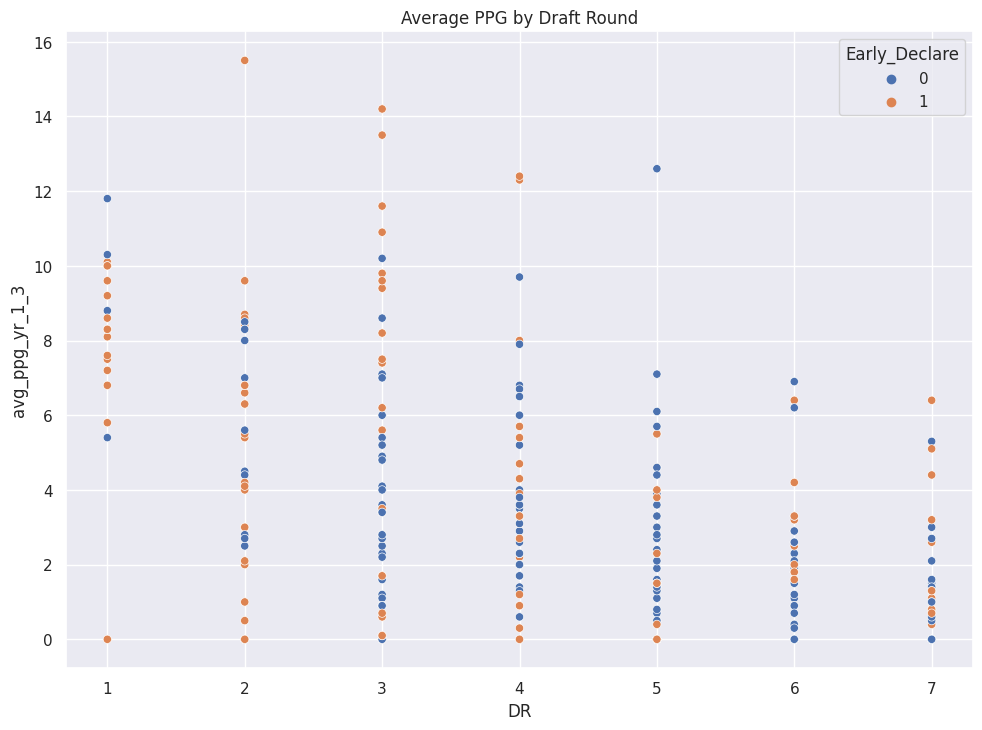

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='DR', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

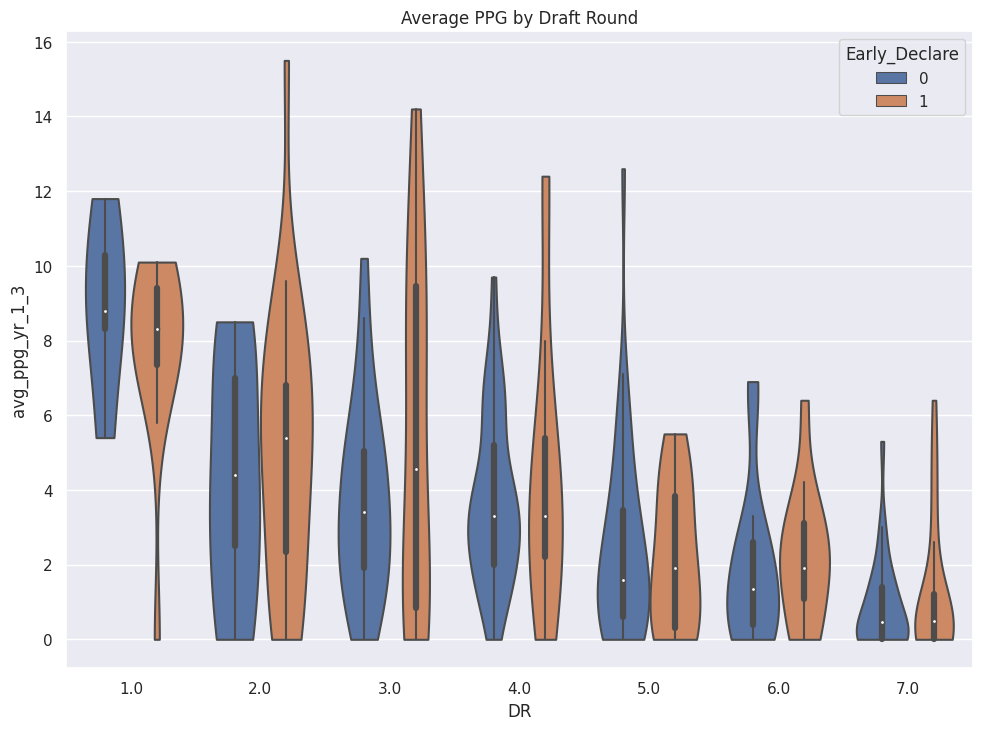

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='DR', y="avg_ppg_yr_1_3", hue = 'Early_Declare', cut=0).set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Pick')]

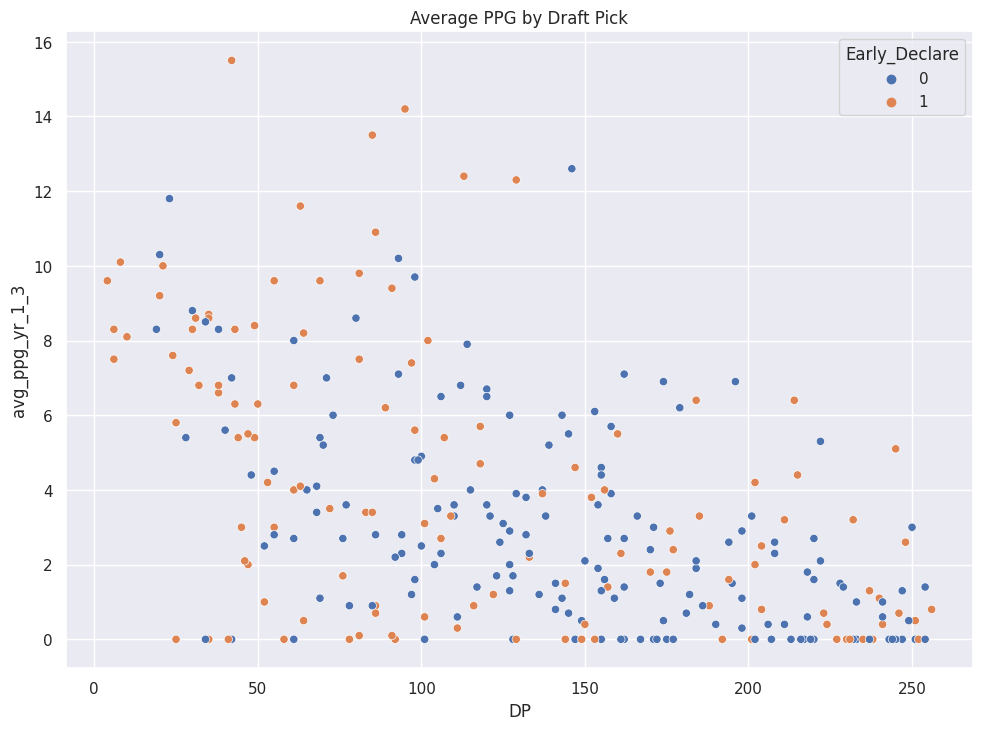

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='DP', y="avg_ppg_yr_1_3", hue='Early_Declare').set(title = 'Average PPG by Draft Pick')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

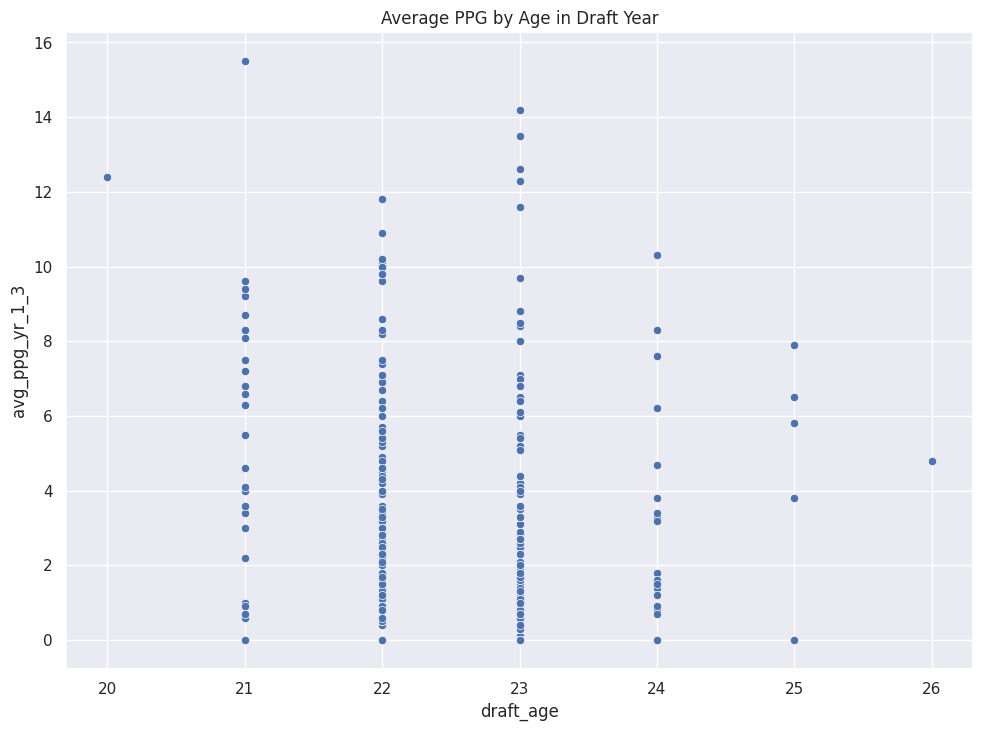

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='draft_age', y="avg_ppg_yr_1_3").set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

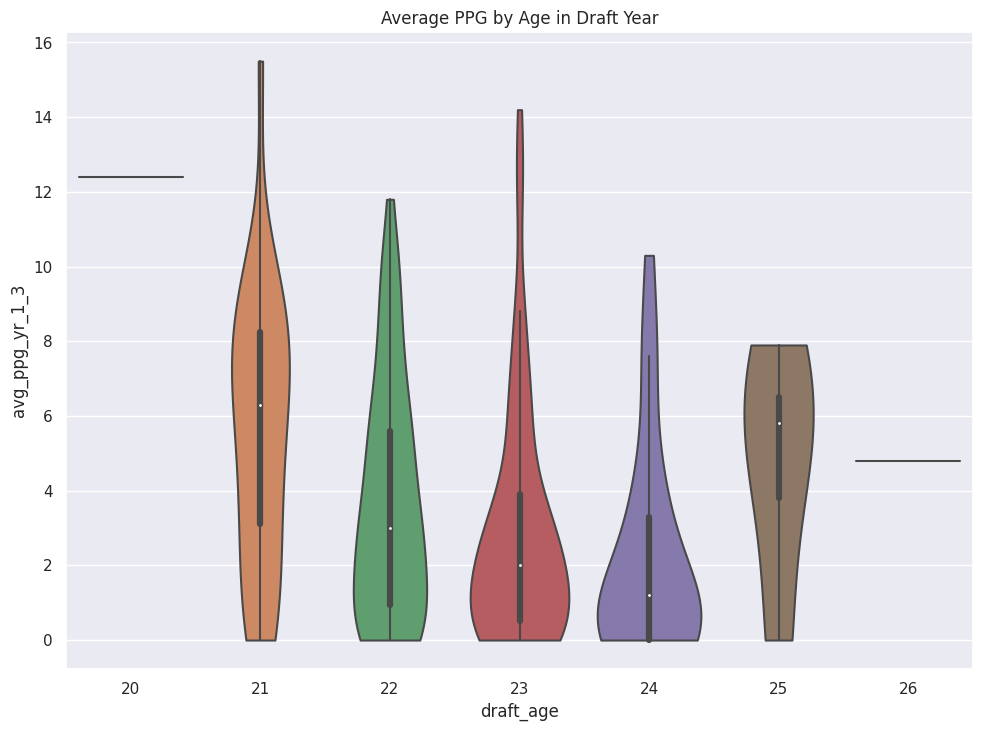

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='draft_age', y="avg_ppg_yr_1_3", cut=0).set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Early Declare Status')]

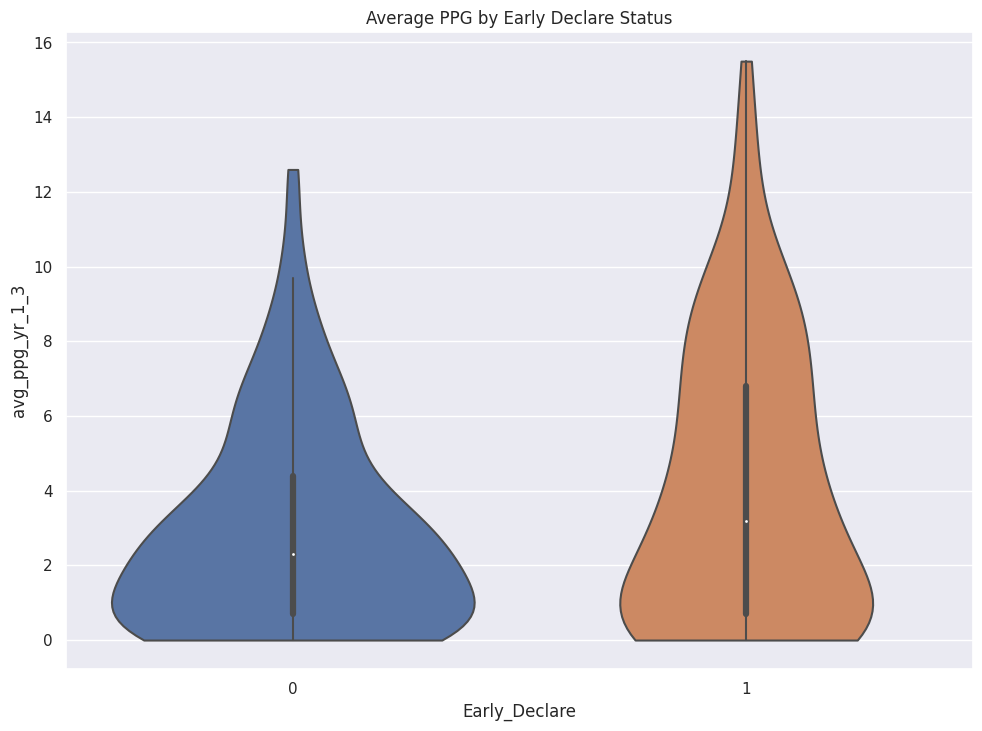

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='Early_Declare', y="avg_ppg_yr_1_3", cut=0).set(title = 'Average PPG by Early Declare Status')

[Text(0.5, 1.0, 'Average PPG by BMI')]

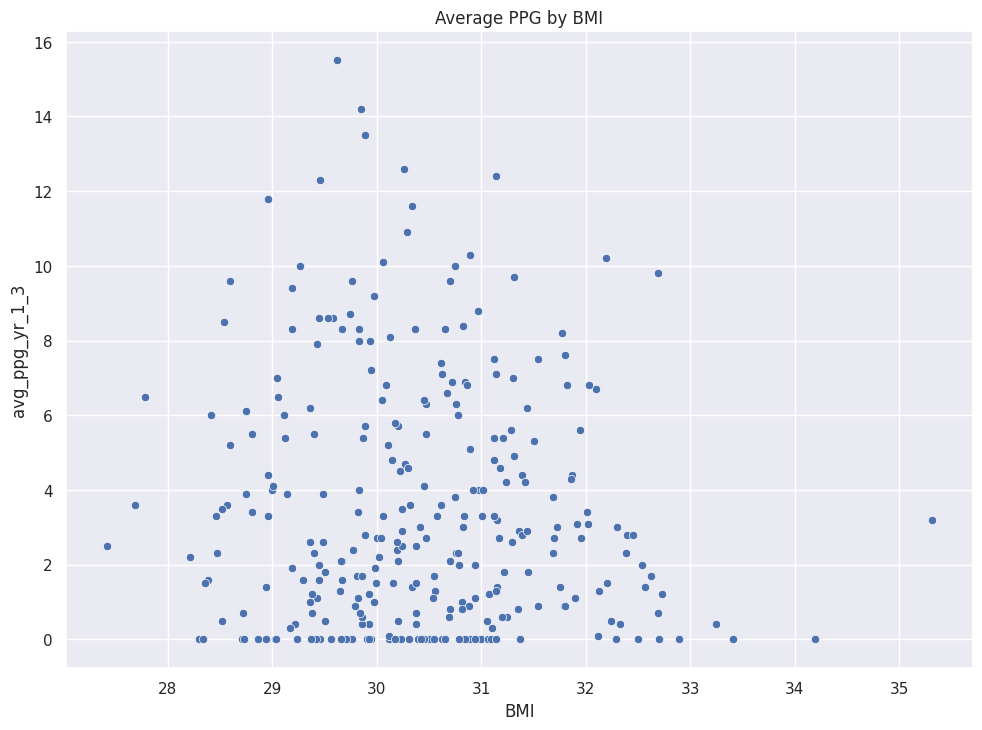

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='BMI', y="avg_ppg_yr_1_3").set(title = 'Average PPG by BMI')

[Text(0.5, 1.0, 'Average PPG by Combined Receiving Market Share')]

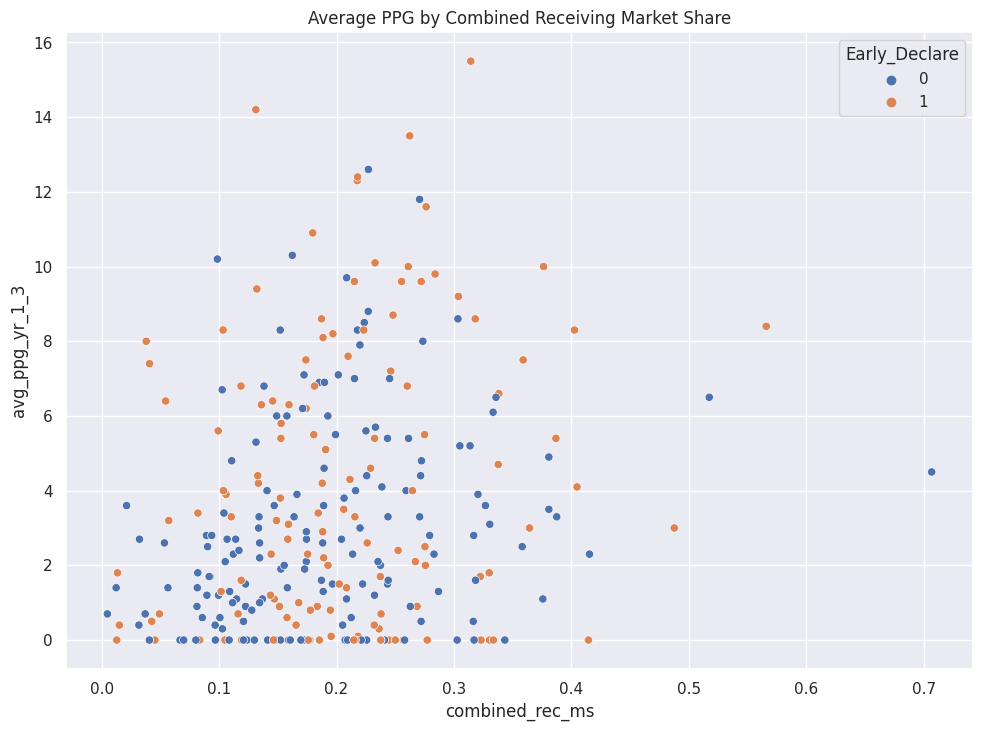

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='combined_rec_ms', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Combined Receiving Market Share')

[Text(0.5, 1.0, 'Average PPG by College Dominator Rating')]

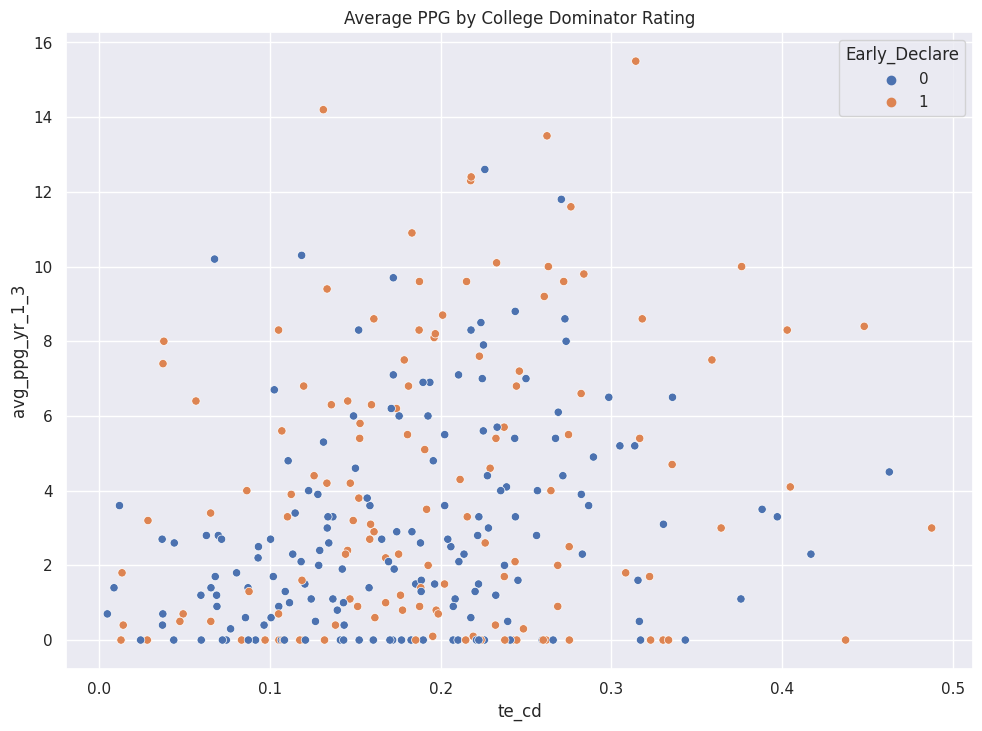

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='te_cd', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by College Dominator Rating')

[Text(0.5, 1.0, 'Average PPG by TE Breakout Age')]

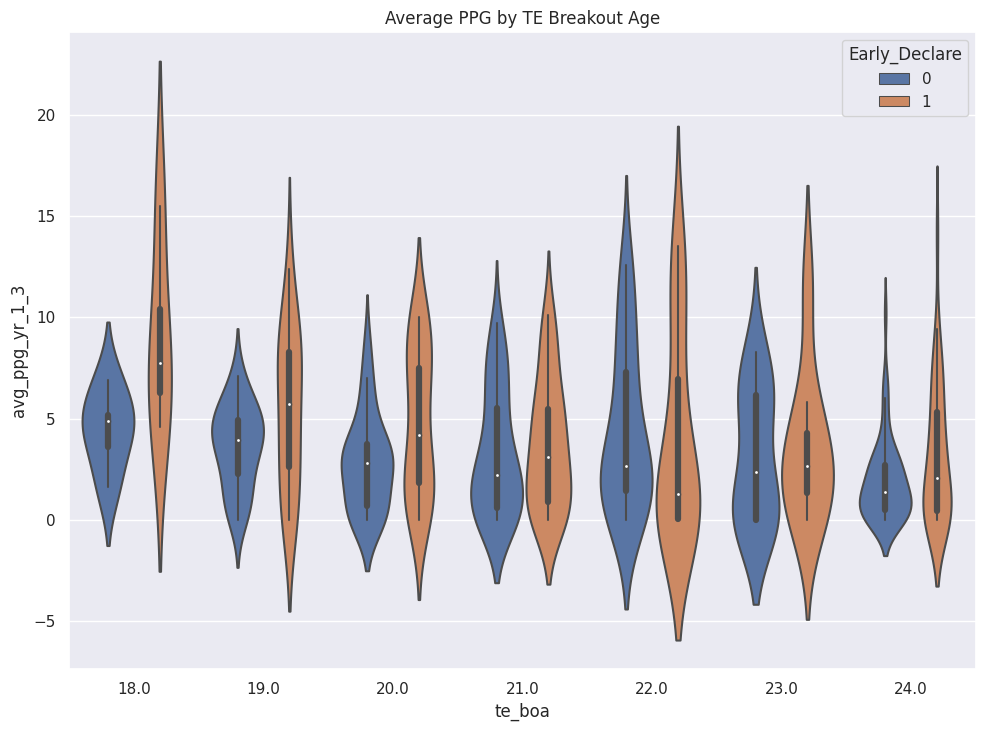

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='te_boa', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by TE Breakout Age')

[Text(0.5, 1.0, 'Average PPG by Hand Size')]

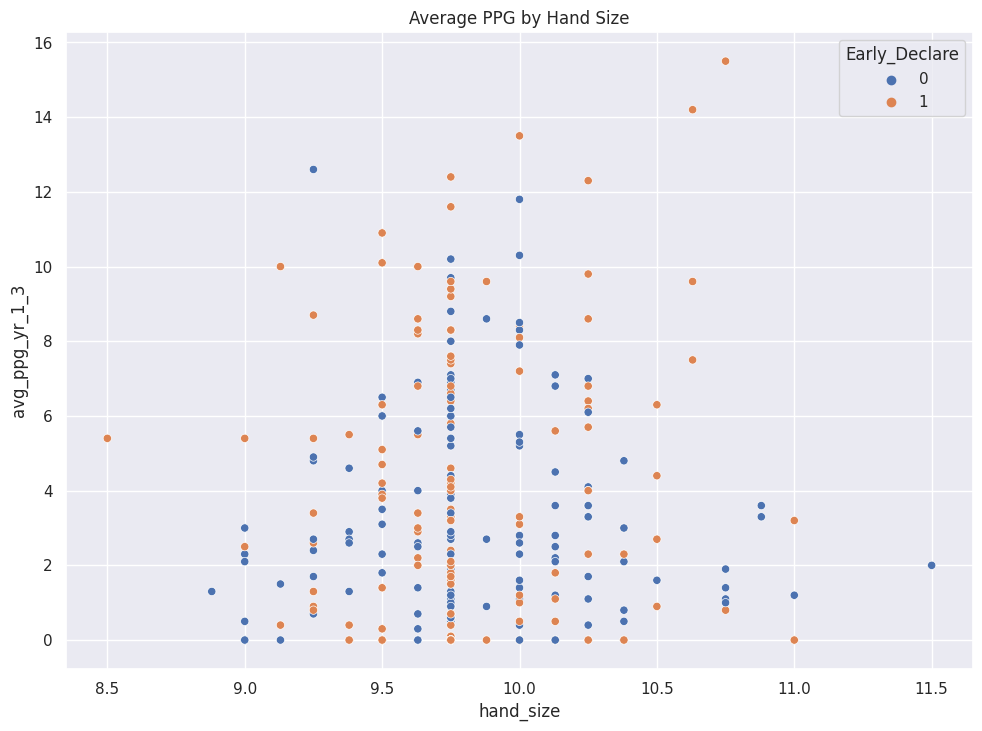

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='hand_size', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Hand Size')

[Text(0.5, 1.0, 'Average PPG by Arm Length')]

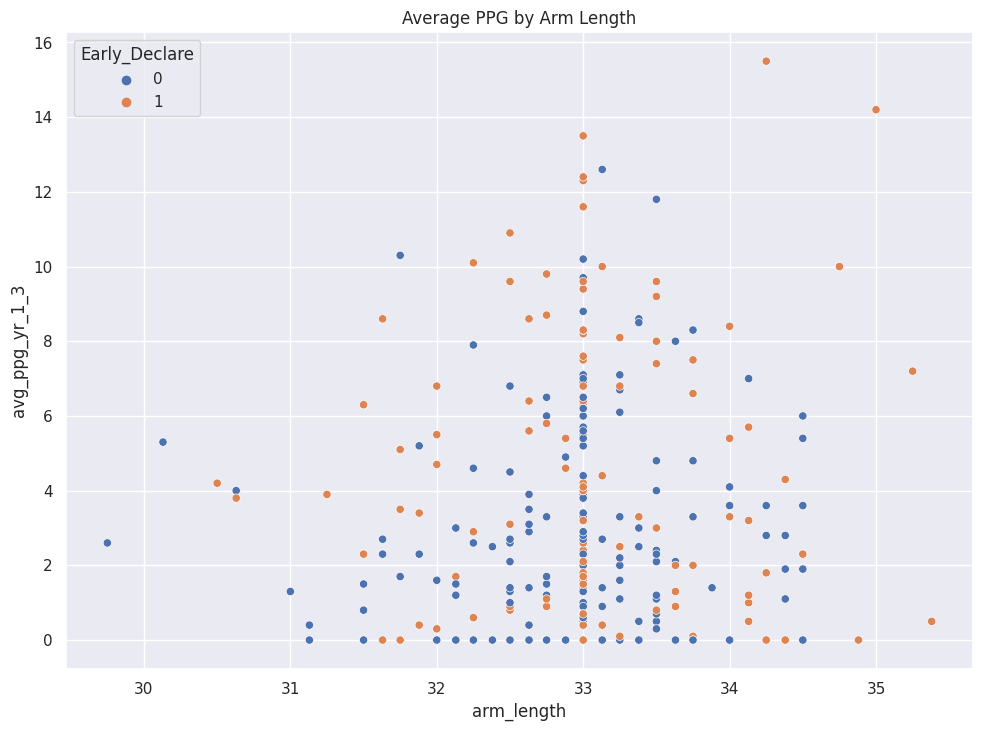

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='arm_length', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Arm Length')

[Text(0.5, 1.0, 'Average PPG by HaSS')]

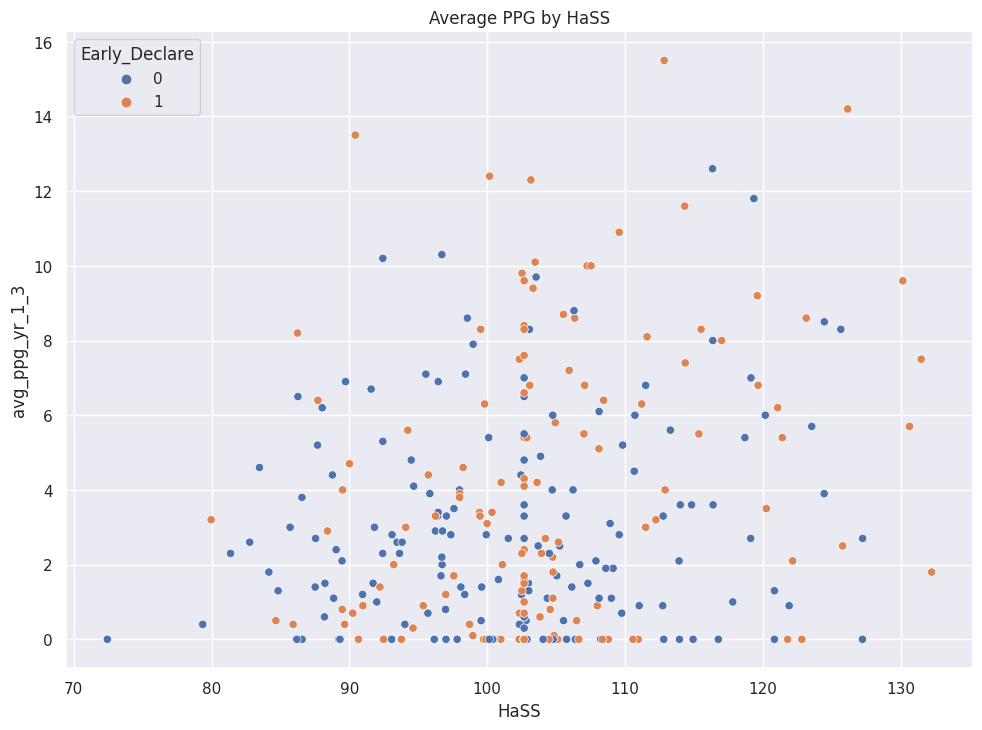

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='HaSS', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by HaSS')

[Text(0.5, 1.0, 'Average PPG by RAS')]

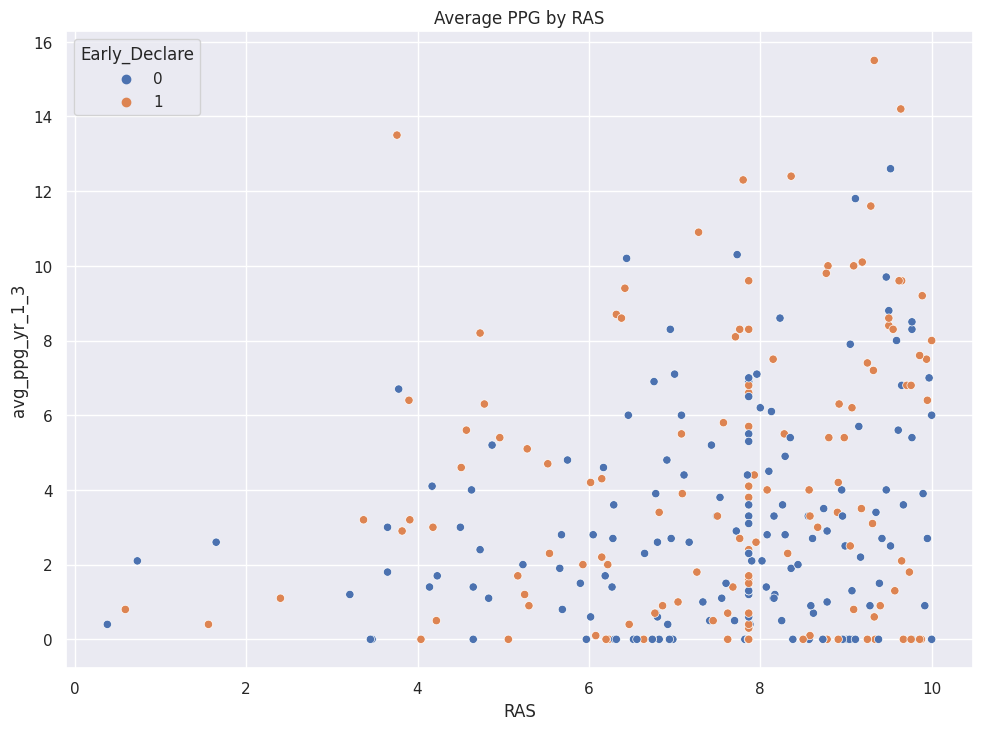

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='RAS', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by RAS')

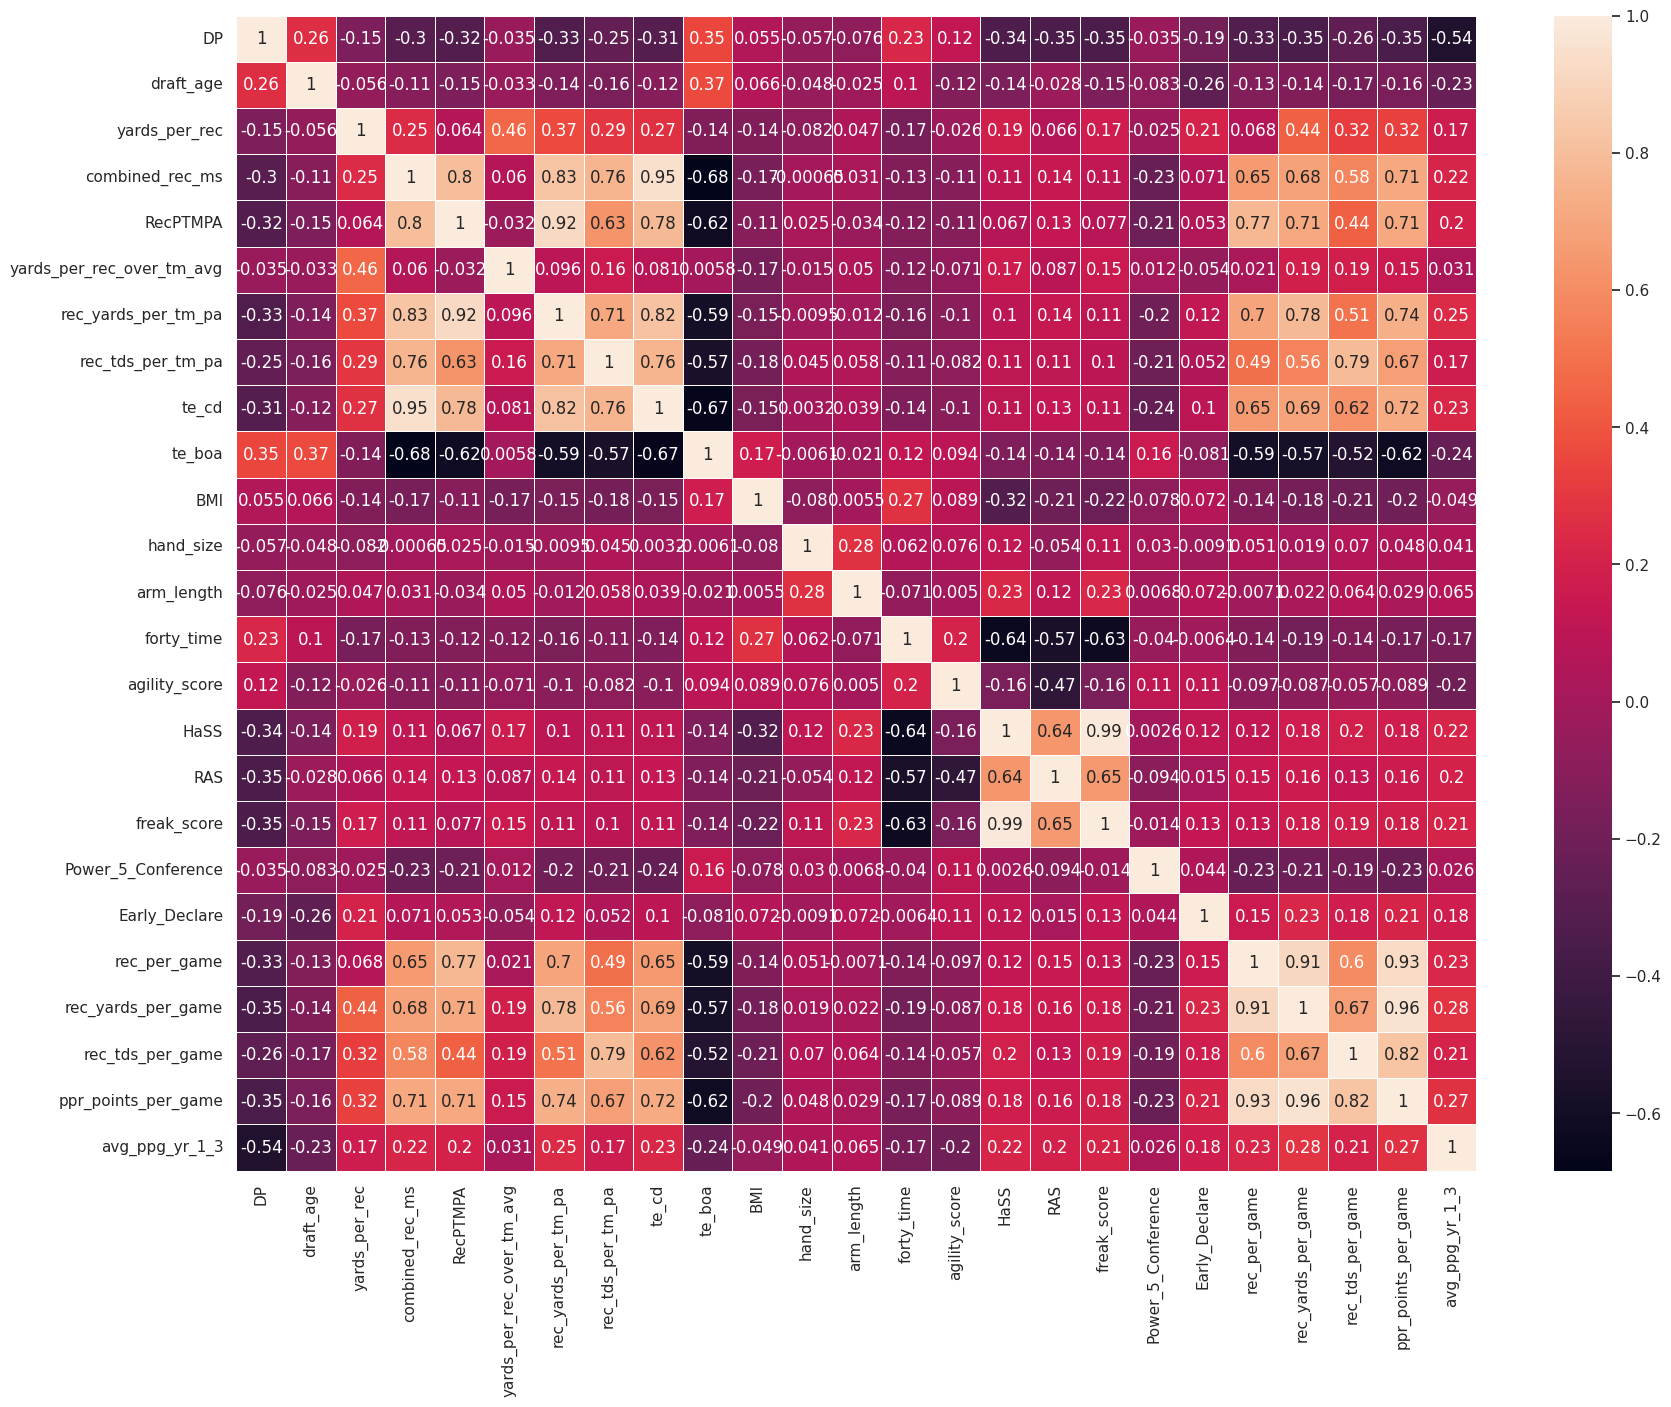

In [ ]:
draft_df_corr_mat = draft_df.drop(['Player','draft_year','DR','top_5_te', 'top_12_te', 'top_24_te' ],axis = 1)
f,ax = plt.subplots(figsize=(20, 15))
corrMatrix = draft_df_corr_mat.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.5,ax=ax)
plt.show()

##1.0 - EDA Conclusions

Conclusions:
*   Tight ends drafted in the first round have a much higher average points per game floor compared to tight ends drafted outside the first round. However, the  6 highest scoring tight ends have been drafted in rounds 2-5
*   With the exception of George Kittle, no tight end drafted in the 5th round or layer has averaged more than 8 points per game in their first three NFL seasons
*   Early declares (player who declare they are entering the NFL Draft before their Senior year season) appear to have higher average points per game ceilings
*   Tight ends with a RAS above 7 tend to average more points per game than those that have a sub 7 RAS
*   The correlation matrix reveals the predictors with the strongest correlation to average points per game in seasons 1-3 are draft capital, receiving yards per game in college, ppr points per game in college, receiving yards per team pass attempt, and tight end breakout age

#D - Feature Selection

In [ ]:
np.random.seed(10)

predictors = draft_df.drop(['avg_ppg_yr_1_3','Player', 'draft_year','DR', 'draft_age', 'top_5_te','top_12_te','top_24_te'],axis = 1)

In [ ]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 3 to 440
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DP                         296 non-null    float64
 1   yards_per_rec              296 non-null    float64
 2   combined_rec_ms            296 non-null    float64
 3   RecPTMPA                   296 non-null    float64
 4   yards_per_rec_over_tm_avg  296 non-null    float64
 5   rec_yards_per_tm_pa        296 non-null    float64
 6   rec_tds_per_tm_pa          296 non-null    float64
 7   te_cd                      296 non-null    float64
 8   te_boa                     296 non-null    float64
 9   BMI                        296 non-null    float64
 10  hand_size                  296 non-null    float64
 11  arm_length                 296 non-null    float64
 12  forty_time                 296 non-null    float64
 13  agility_score              296 non-null    float64

#E - Standardization

##1.0 Density Plots

###1.1 Density Plot of Inputs Before Standardization

Text(0.5, 1.0, 'Train Inputs Density Plot')

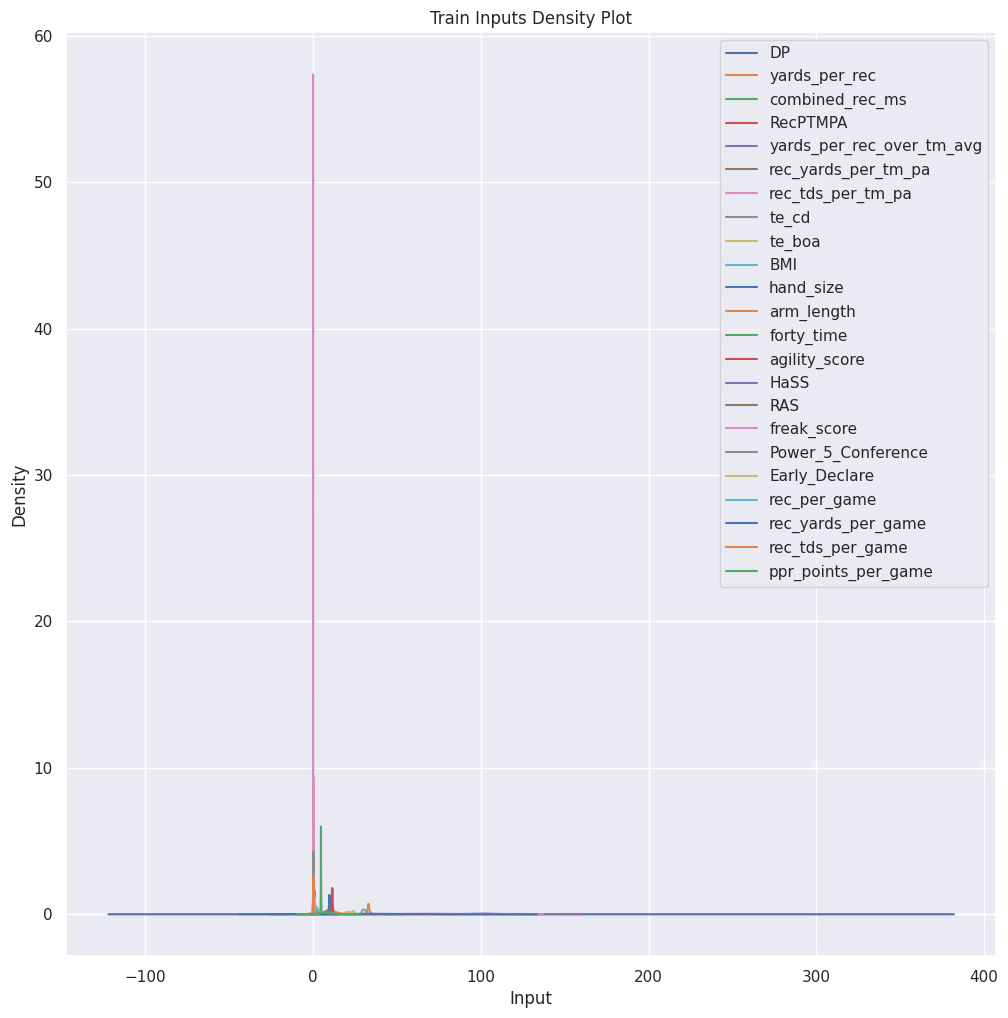

In [ ]:
#density plot of inputs
predictors.plot.density(figsize = (12, 12))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Train Inputs Density Plot")

###1.2 - Density Plot of Inputs Post Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit and transform
standard_predictors= scaler.fit_transform(predictors)

standard_predictors_df = pd.DataFrame(standard_predictors)

Text(0.5, 1.0, 'Standardized Train Inputs Density Plot')

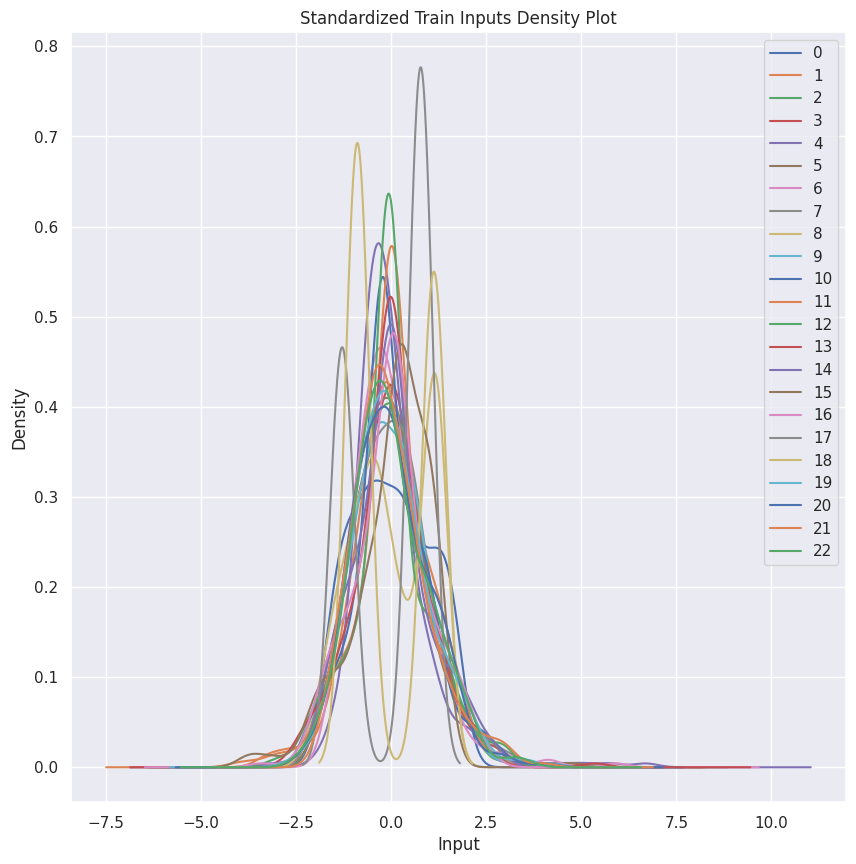

In [ ]:
standard_predictors_df.plot.density(figsize = (10, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Standardized Train Inputs Density Plot")

#F - Clustering

##1.0 K-Means Clustering

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
kmeans_model = KMeans(n_clusters=6)
# fit the model
kmeans_model.fit(predictors)
# assign a cluster to each example
kmeans_yhat = kmeans_model.predict(predictors)
# retrieve unique clusters
kmeans_clusters = unique(kmeans_yhat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##2.0 Cluster Analysis

In [ ]:
#create dataframe
df_cluster = pd.DataFrame()
df_cluster['player'] =  draft_df['Player']
df_cluster['cluster'] = kmeans_yhat
df_cluster['average_PPG'] = draft_df['avg_ppg_yr_1_3']
df_cluster['number_of_top_5_season'] = draft_df['top_5_te']
df_cluster['number_of_top_12_season'] = draft_df['top_12_te']

#determine if player had 1 top 5 and/or top 12 seasons
df_cluster['top_5_season'] = np.where((df_cluster.number_of_top_5_season >= 1),1, 0)
df_cluster['top_12_season'] = np.where((df_cluster.number_of_top_12_season >= 1),1, 0)

#drop unwanted columns
df_cluster = df_cluster.drop(['number_of_top_5_season','number_of_top_12_season'], axis = 1)

df_cluster.head(60)


,player,cluster,average_PPG,top_5_season,top_12_season
3,Brayden Willis,3,0.0,0,0
4,Brenton Strange,4,0.0,0,0
5,Cameron Latu,2,0.0,0,0
8,Dalton Kincaid,1,0.0,0,0
10,Darnell Washington,4,0.0,0,0
11,Davis Allen,5,0.0,0,0
18,Josh Whyle,0,0.0,0,0
22,Luke Musgrave,1,0.0,0,0
23,Luke Schoonmaker,4,0.0,0,0
25,Michael Mayer,1,0.0,0,0


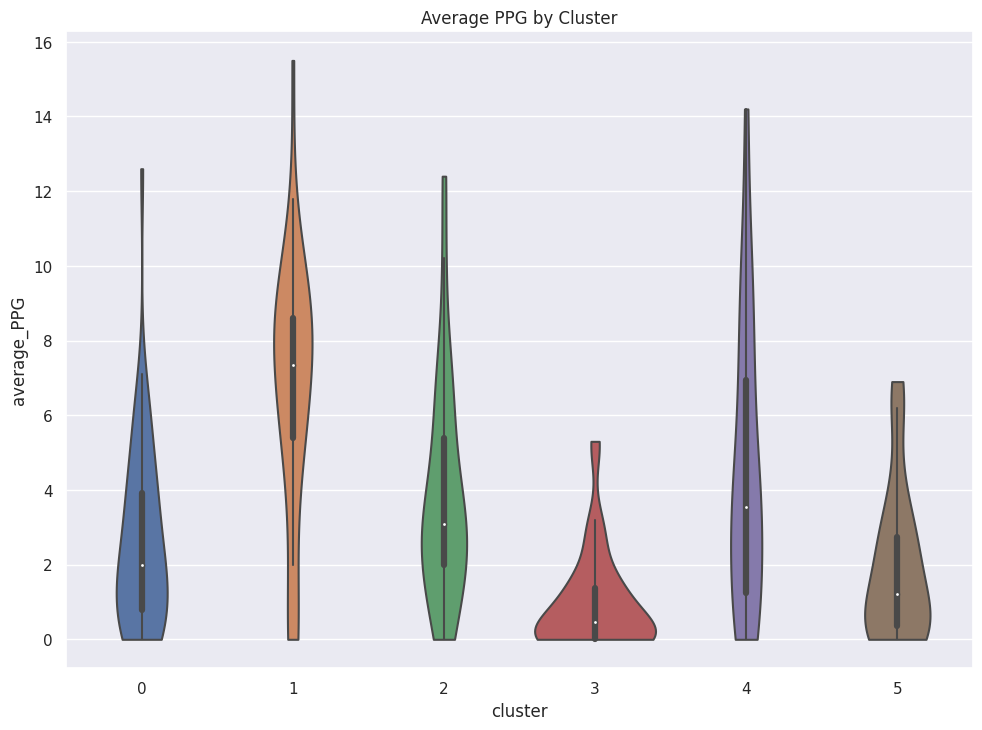

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.violinplot(data=df_cluster, x='cluster', y="average_PPG", cut=0).set(title = 'Average PPG by Cluster');

###2.1 Cluster Metrics

In [ ]:
#function that determines percentage of players in each cluster that averaged 10+ppg in their first three seasons
def above_10_percentages_func(clusters):
  for index, cluster in enumerate(clusters):
    above_10_count = len(df_cluster[(df_cluster['average_PPG']>=10) & (df_cluster['cluster']==cluster)])
    count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
    above_10_percentage = round((above_10_count/count_in_cluster)*100,2)
    above_10_percentages.append(above_10_percentage)
    count_in_clusters.append(count_in_cluster)
  return above_10_percentages
  return count_in_clusters

In [ ]:
#function that determines percentage of players in each cluster that had at least one top 5, 12, or 24 season
def top_seasons_func(clusters):
  for index, cluster in enumerate(clusters):
    top_5_count = len(df_cluster[(df_cluster['top_5_season']>=1) & (df_cluster['cluster']==cluster)])
    top_12_count = len(df_cluster[(df_cluster['top_12_season']>=1) & (df_cluster['cluster']==cluster)])
    count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
    top_5_percentage = round((top_5_count/count_in_cluster)*100,2)
    top_12_percentage = round((top_12_count/count_in_cluster)*100,2)
    top_5_percentages.append(top_5_percentage)
    top_12_percentages.append(top_12_percentage)
  return top_5_percentages
  return top_12_percentages

In [ ]:
#set clusters equal to # of clusters defined in kmeans model
clusters = np.arange(0,kmeans_model.n_clusters).tolist()

#create lists for storing cluster metrics
above_10_percentages = []
count_in_clusters = []
top_5_percentages = []
top_12_percentages = []

#get cluster metrics
above_10_percentages_func(clusters);
top_seasons_func(clusters);

In [ ]:
#create cluster comparison dataframe
df_hit_rate = pd.DataFrame()
df_hit_rate['cluster'] = clusters
df_hit_rate['player_count'] = count_in_clusters
df_hit_rate['percent_of_players_that_avg_10+_ppg'] = above_10_percentages
df_hit_rate['percent_of_players_that_had_top_5_season'] = top_5_percentages
df_hit_rate['percent_of_players_that_had_top_12_season'] = top_12_percentages
df_hit_rate.sort_values(by=['percent_of_players_that_avg_10+_ppg'],ascending=False, inplace = True)
df_hit_rate.head(17)

,cluster,player_count,percent_of_players_that_avg_10+_ppg,percent_of_players_that_had_top_5_season,percent_of_players_that_had_top_12_season
1,1,44,13.64,29.55,63.64
4,4,50,8.00,16.00,26.00
2,2,61,4.92,8.20,14.75
0,0,56,1.79,8.93,12.50
3,3,46,0.00,0.00,0.00
5,5,39,0.00,2.56,7.69


###2.2 Cluster Conclusions

Observing the cluster dataframe, the following conclusions can be made:
* Cluster 1 is by far the best cluster, with 13% of the players averaging 10+ points per game over their first three seasons in the NFL - players that fall in this cluster should be highly considered when drafting tight ends
* Cluster 1 has the highest hit rate for top 5 and top 12 fantasy finishes at the tight end position, with 29.55% of players in the cluster having at least one top 5 scoring season and 63% with a top 12 season
* Clusters below cluster 4 are noticeably filled with low scoring fantasy players. Players in these clusters should be avoided altogether or would be better targets for very late rounds as the players are much less likley to provide fantasy value.




#G - Save to .csv for Further Analysis in Visualization Software

In [ ]:
#Create csv file to use in visualization software
#df_cluster.to_csv("TE_clusters.csv")